In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
#metrics for evaluating performance
#https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093
#https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52
#http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html



### Exploration of the data

In [4]:
base_path = 'C:\\Users\\nicor\\OneDrive\\Documentos\\Python\\Kaggle\\H&M Personalize fashion Recommender system - datasets\\'

In [5]:
#### loading csv files into dataframes

In [6]:
#load articles dataset
articles = pd.read_csv(base_path + 'articles.csv')

#load customers dataset
customers = pd.read_csv(base_path + 'customers.csv')

#load transactions dataset
transactions = pd.read_csv(base_path + 'transactions_train.csv')

#load sample submission dataset
sample_submission = pd.read_csv(base_path + 'sample_submission.csv')

In [7]:
#Exploration of the articles dataset
articles.info()
articles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
#filtering articles dataset
articles_filtered = articles.drop(columns=['graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name'])


In [9]:
#Exploration of na values in articles dataset
articles_filtered.isnull().sum() #no na values (except for the description...) 

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [10]:
#creating a dataframe with the article_id and prod_name 
articles_id_name = articles[['article_id' , 'prod_name']].drop_duplicates().reset_index(drop=True)

In [11]:
#Exploration of the customers dataset
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
#filtering columns of customers dataset
customers_filtered = customers[['customer_id', 'Active', 'age']]

In [13]:
total_entries_c = len(customers_filtered)

#Exploration of na values in customer_id column
print(customers_filtered.customer_id.isna().sum()) #no na values

#Exploration of na values in Active column
print(f'The amount of NA values in the Active col is:{customers_filtered.Active.isna().sum()} ({round(customers_filtered.Active.isna().sum()/total_entries_c*100,2)}%)') 

#Replacing na values in Active column with 0
customers_filtered.Active.fillna(0, inplace=True)

#Exploration of na values in age column
print(f'The amount of NA values in the Active col is:{customers_filtered.age.isna().sum()} ({round(customers_filtered.age.isna().sum()/total_entries_c*100,2)}%)') 

#Replacing na values in age column with the average of the age column
customers_filtered.age.fillna(customers_filtered.age.mean(), inplace=True)

0
The amount of NA values in the Active col is:907576 (66.15%)
The amount of NA values in the Active col is:15861 (1.16%)


C:\Users\nicor\anaconda3\envs\mne3\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
#Clustering of the age column

#k means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

label = KMeans(n_clusters=5, random_state=0).fit(customers_filtered.age.values.reshape(-1,1))
labels = label.predict(customers_filtered.age.values.reshape(-1,1))


The amount of customers in cluster 0 is 204606 being the center located at 21 years
The amount of customers in cluster 1 is 412158 being the center located at 29 years
The amount of customers in cluster 2 is 311395 being the center located at 39 years
The amount of customers in cluster 3 is 338303 being the center located at 51 years
The amount of customers in cluster 4 is 105518 being the center located at 64 years


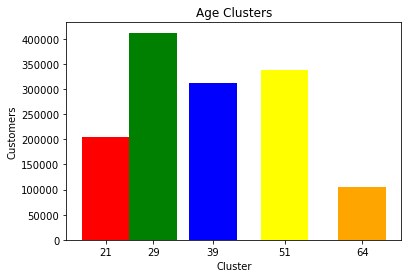

In [29]:
#calculating how many customers are in each cluster
cluster_count = pd.DataFrame(labels, columns=['cluster'])
cluster_count = cluster_count.groupby('cluster').size().reset_index(name='count')

#calculating the cluster centers
plot_age_cluster = pd.DataFrame(label.cluster_centers_, columns=['age_cluster'])
plot_age_cluster['age_cluster'] = plot_age_cluster['age_cluster'].astype(int).sort_values().reset_index(drop=True)

plot_age_cluster.index.name = 'cluster'

#merge the dataframes
plot_age_cluster = pd.merge(plot_age_cluster, cluster_count, on='cluster')

for i in plot_age_cluster['cluster'].unique():
    print(f'The amount of customers in cluster {i} is {plot_age_cluster.loc[i, "count"]} being the center located at {plot_age_cluster.loc[i, "age_cluster"]} years')

#plotting the clusters
x = plot_age_cluster['age_cluster']
y = plot_age_cluster.loc[:, 'count']

#plot the clusters with multiple colors
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow', 'orange'],label = plot_age_cluster['age_cluster'], width= 8)
plt.xticks(plot_age_cluster['age_cluster'], plot_age_cluster['age_cluster'])
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.title('Age Clusters')
plt.show()    

In [16]:
#Exploration of transaction dataset
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [17]:
#Exploration of na values in transaction dataset
total_entries_t = len(transactions)

for item in transactions.columns: #no na values! 
    print(f'The amount of NA values in the {item} column is:{transactions[item].isna().sum()} ({round(transactions[item].isna().sum()/total_entries_t*100,2)}%)')

The amount of NA values in the t_dat column is:0 (0.0%)
The amount of NA values in the customer_id column is:0 (0.0%)
The amount of NA values in the article_id column is:0 (0.0%)
The amount of NA values in the price column is:0 (0.0%)
The amount of NA values in the sales_channel_id column is:0 (0.0%)


In [18]:
#Exploring if a same customer bought the same article more than once
purchase_freq = transactions.groupby(['customer_id', 'article_id']).size().reset_index(name='count')

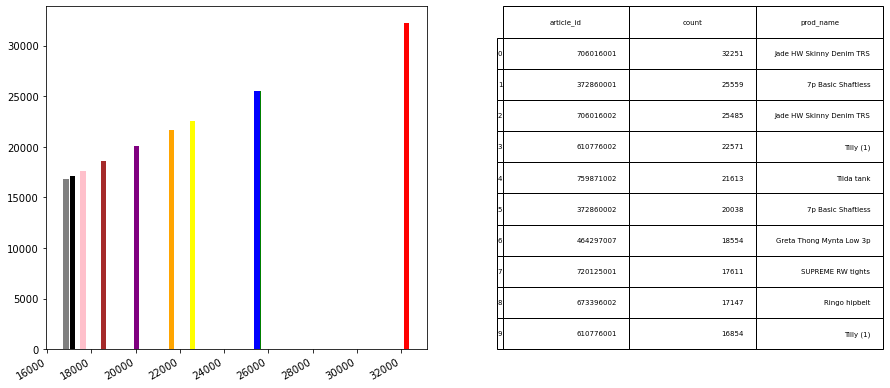

In [19]:
#plot the frequency of purchases of the top 10 most purchased articles
purchase_freq_top10 = purchase_freq.groupby('article_id').size().reset_index(name='count')
purchase_freq_top10 = purchase_freq_top10.sort_values(by='count', ascending=False).head(10)

#merge the name of the products to the dataframe
purchase_freq_top10 = purchase_freq_top10.merge(articles_id_name, left_on='article_id', right_on='article_id')

#plot into a graph the frequency of purchases of the top 10 most purchased articles
top10_art = purchase_freq_top10['prod_name']
top10_count = purchase_freq_top10['count']

#final adjustments pending

fig = plt.figure(figsize=[15,7])
ax1 = fig.add_subplot(121)
ax1.bar(top10_count, top10_count, width=250,color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink', 'black', 'grey'])
fig.autofmt_xdate()
ax2 = fig.add_subplot(122)
font_size = 40
bbox = [0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText=purchase_freq_top10.values, rowLabels=purchase_freq_top10.index, bbox=bbox, colLabels=purchase_freq_top10.columns)
plt.show()

In [25]:
#merge the cluster of the age column to the customers dataset
customers_filtered = customers_filtered.merge(plot_age_cluster, left_on='age', right_on='age_cluster')

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [22]:
from sklearn import preprocessing

#create a function to build a collabortive filtering recommender system
def get_recommendations(customer_id, articles_id_name, transactions, articles, customers, k=5):
    #get the customer's cluster
    customer_cluster = customers.loc[customers['customer_id'] == customer_id, 'cluster'].values[0]
    
    #get the articles for that cluster
    cluster_articles = articles.loc[articles['cluster'] == customer_cluster]
    
    #get the articles the customer has already bought
    customer_transactions = transactions.loc[transactions['customer_id'] == customer_id]
    
    #get the articles the customer has already bought
    customer_articles = customer_transactions['article_id']
    
    #get the articles that are in the cluster but the customer has not bought yet
    cluster_articles = cluster_articles.loc[~cluster_articles['article_id'].isin(customer_articles)]
    
    #get the similarity score for each article in the cluster
    similarity_scores = []
    for article in cluster_articles['article_id']:
        similarity_scores.append((article, cosine_similarity(articles.loc[articles['article_id'] == article, 'article_vector'].values[0], articles.loc[articles['article_id'] == customer_articles.values[0], 'article_vector'].values[0])[0][0]))
    
    #sort the articles based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    #get the k most similar articles to the customer
    article_list = []
    for i in range(k):
        article_list.append(similarity_scores[i][0])
    
    #get the titles of the k most similar articles
    article_list_names = []
    for i in article_list:
        article_list_names.append(articles_id_name.loc[articles_id_name['article_id'] == i, 'prod_name'].values[0])
    
    #return the titles of the k most similar articles
    return article_list_names

In [24]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [23]:
get_recommendations(customer_id=1, articles_id_name=articles_id_name, transactions=transactions, articles=articles, customers=customers, k=5)

KeyError: 'cluster'